In [29]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('.\kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

sns.set_style('darkgrid')

%matplotlib inline

In [31]:
df=pd.read_csv('./kaggle/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<AxesSubplot:>

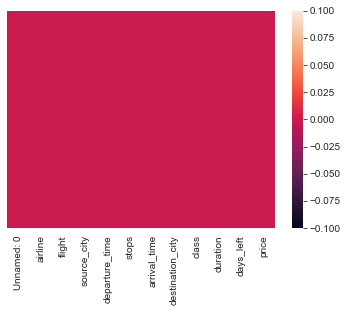

In [32]:
sns.heatmap(df.isna(),yticklabels=False)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [34]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [35]:
for col in df.select_dtypes(include='object').columns:
    
    print(f"{col:25} ---> {df[col].nunique():15} unique values")

airline                   --->               6 unique values
flight                    --->            1561 unique values
source_city               --->               6 unique values
departure_time            --->               6 unique values
stops                     --->               3 unique values
arrival_time              --->               6 unique values
destination_city          --->               6 unique values
class                     --->               2 unique values


In [36]:
oh=OneHotEncoder(drop='first',handle_unknown='ignore')
ms,ss=MinMaxScaler(),StandardScaler()


ct=ColumnTransformer([
    ("cat_encoder",oh,make_column_selector(dtype_include='object')),
#     ("num_encoder",ms,make_column_selector(dtype_exclude='object'))
],remainder='passthrough')

In [37]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_encoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe243dd59a0>)])

In [38]:
X=df.drop(['price'],axis=1)
y=df[['price']]

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [40]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((270137, 11), (30016, 11), (270137, 1), (30016, 1))

In [41]:
X_test.head(2)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
27131,27131,Air_India,AI-506,Delhi,Morning,one,Early_Morning,Kolkata,Economy,19.75,40
266857,266857,Vistara,UK-706,Kolkata,Morning,one,Night,Mumbai,Business,9.83,42


In [42]:
y_test.head(2)

,price
27131,7366
266857,64831


In [43]:
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)

In [44]:
print("-"*50)
for i in ct.transformers_:
    print(i)
    if(i[0]!='remainder'):
        print(i[1].get_feature_names_out())   
    print("-"*50)

--------------------------------------------------
('cat_encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class'])
['airline_Air_India' 'airline_GO_FIRST' 'airline_Indigo' ...
 'destination_city_Kolkata' 'destination_city_Mumbai' 'class_Economy']
--------------------------------------------------
('remainder', 'passthrough', [0, 9, 10])
--------------------------------------------------


In [45]:
X_test[0].toarray(),y_test.head(1).values

(array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.7131e+04, 1.9750e+01,
         4.0000e+01]]),
 array([[7366]]))

In [46]:
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from sklearn.neighbors import KNeighborsRegressor

In [47]:
from sklearn.neural_network import MLPRegressor
reg_list=[
    LinearRegression(n_jobs=-1),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(n_estimators=100,n_jobs=-1),
    GradientBoostingRegressor(n_estimators=100),
    AdaBoostRegressor(n_estimators=100),
    KNeighborsRegressor(n_neighbors=2),
    Ridge(),
    MLPRegressor(hidden_layer_sizes=(15,10,5), max_iter = 300,activation = 'relu', solver = 'adam')
]

In [48]:
print("-"*50)
for reg in reg_list:
    print(reg)
    print("-"*50) 

--------------------------------------------------
LinearRegression(n_jobs=-1)
--------------------------------------------------
DecisionTreeRegressor()
--------------------------------------------------
ExtraTreeRegressor()
--------------------------------------------------
RandomForestRegressor(n_jobs=-1)
--------------------------------------------------
GradientBoostingRegressor()
--------------------------------------------------
AdaBoostRegressor(n_estimators=100)
--------------------------------------------------
KNeighborsRegressor(n_neighbors=2)
--------------------------------------------------
Ridge()
--------------------------------------------------
MLPRegressor(hidden_layer_sizes=(15, 10, 5), max_iter=300)
--------------------------------------------------


In [49]:
%%time
print("-"*50)
for reg in reg_list:
    reg_name=reg.__class__.__name__
    reg.fit(X_train,y_train.values.ravel())
    print(f"Fitting {reg_name} done")
    print("-"*50)

--------------------------------------------------
Fitting LinearRegression done
--------------------------------------------------
Fitting DecisionTreeRegressor done
--------------------------------------------------
Fitting ExtraTreeRegressor done
--------------------------------------------------
Fitting RandomForestRegressor done
--------------------------------------------------
Fitting GradientBoostingRegressor done
--------------------------------------------------
Fitting AdaBoostRegressor done
--------------------------------------------------
Fitting KNeighborsRegressor done
--------------------------------------------------
Fitting Ridge done
--------------------------------------------------
Fitting MLPRegressor done
--------------------------------------------------
CPU times: user 54min 56s, sys: 3min 47s, total: 58min 43s
Wall time: 9min 30s


In [50]:
score_dict={}

for reg in reg_list:
    
    reg_name = reg.__class__.__name__
    
    pred=reg.predict(X_test)
    
    print("-"*50)
    
    print(reg_name)
    
    print(f"R2 Score : {r2_score(y_test,pred)}")
    print(f"Mean Absolute Error Score : {mean_absolute_error(y_test,pred)}")
    print(f"Mean Sqaured Error Score : {mean_squared_error(y_test,pred)}")
    print(f"Root Mean Squared Error: {mean_squared_error(y_test,pred, squared=False)}")

    
    
    score_dict[reg_name]={
        "R2 Score":r2_score(y_test,pred),
        "Mean Absolute Error Score":mean_absolute_error(y_test,pred),
        "Mean Squared Error Score":mean_squared_error(y_test,pred),
        "Root Mean Squared Error": mean_squared_error(y_test,pred, squared=False)
    }
    
print("-"*50)

--------------------------------------------------
LinearRegression
R2 Score : 0.925542573445328
Mean Absolute Error Score : 4267.244105703824
Mean Sqaured Error Score : 38342549.34108666
Root Mean Squared Error: 6192.1360887085375
--------------------------------------------------
DecisionTreeRegressor
R2 Score : 0.9868742886960873
Mean Absolute Error Score : 702.6477878464818
Mean Sqaured Error Score : 6759208.001066098
Root Mean Squared Error: 2599.8476880513786
--------------------------------------------------
ExtraTreeRegressor
R2 Score : 0.9850264979949057
Mean Absolute Error Score : 807.958388859275
Mean Sqaured Error Score : 7710745.133228945
Root Mean Squared Error: 2776.822848729991
--------------------------------------------------
RandomForestRegressor
R2 Score : 0.9913039162405449
Mean Absolute Error Score : 733.7883405517057
Mean Sqaured Error Score : 4478129.799131594
Root Mean Squared Error: 2116.159209306236
--------------------------------------------------
GradientB

In [51]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values("R2 Score",ascending=False)
score_pd

,R2 Score,Mean Absolute Error Score,Mean Squared Error Score,Root Mean Squared Error
RandomForestRegressor,0.991304,733.788341,4.478130e+06,2116.159209
KNeighborsRegressor,0.988040,555.664029,6.159150e+06,2481.763405
DecisionTreeRegressor,0.986874,702.647788,6.759208e+06,2599.847688
ExtraTreeRegressor,0.985026,807.958389,7.710745e+06,2776.822849
GradientBoostingRegressor,0.955376,2869.484740,2.297941e+07,4793.684158
MLPRegressor,0.937266,3712.831041,3.230554e+07,5683.796248
LinearRegression,0.925543,4267.244106,3.834255e+07,6192.136089
AdaBoostRegressor,0.924314,4072.969612,3.897544e+07,6243.031118
Ridge,0.576607,12092.876077,2.180303e+08,14765.850109


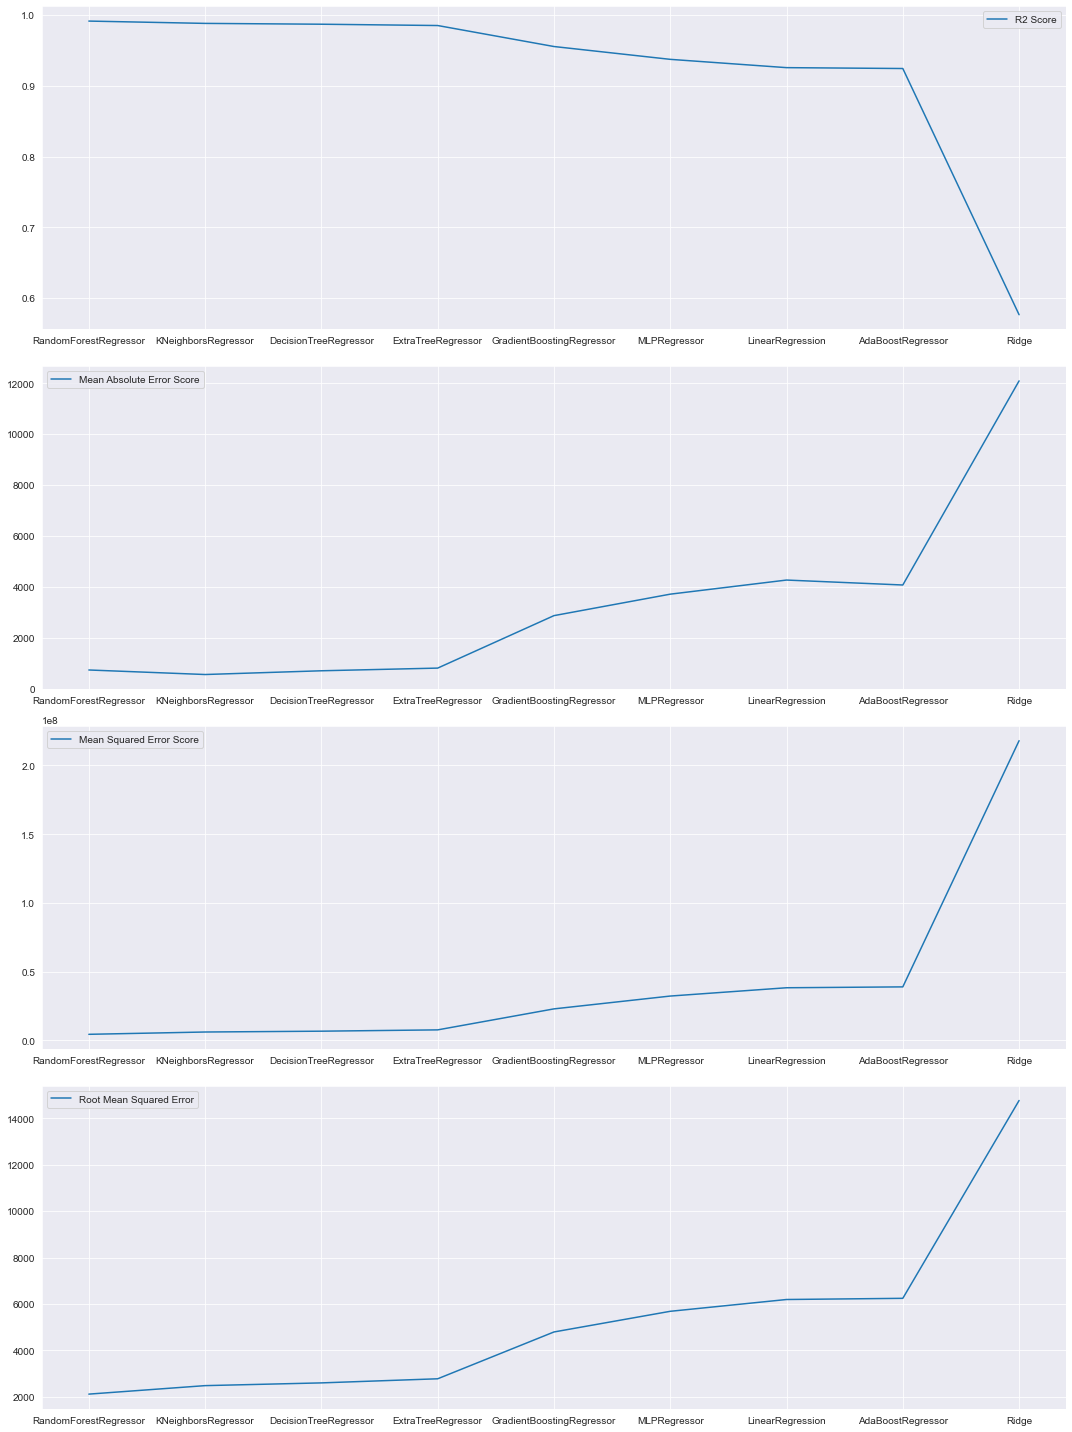

In [52]:
fig,ax=plt.subplots(score_pd.shape[1],1,figsize=(15,20))

axi=0
for col in score_pd.columns:
    sns.lineplot(data=score_pd[[col]],ax=ax[axi])
    axi+=1
plt.tight_layout()